# Clustering
## Libraries and Datasets


In [16]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myclustering.R")
load(url("https://github.com/eogasawara/mylibrary/raw/master/data/wine.RData"))

Loading required package: dbscan
Warning message:
"package 'dbscan' was built under R version 3.5.1"
Attaching package: 'dbscan'

The following object is masked from 'package:fpc':

    dbscan

The following object is masked from 'package:DMwR':

    kNN



kmeans with 2 clusters

X1,X14.23,X1.71,X2.43,X15.6,X127,X2.8,X3.06,X.28,X2.29,X5.64,X1.04,X3.92,X1065,cluster
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,2
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,2


        1  2  3
ctable 58 71 48
        9 67 47
       49  4  1
[1] 1.0859033 0.8898562 0.3548290


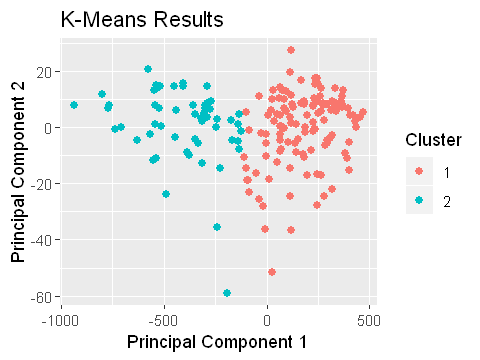

In [2]:
kmeans2 <- clust_kmeans(wine, "X1", 2)
head(kmeans2$data)
options(repr.plot.width=4, repr.plot.height=3)
plot(kmeans2$plot)
print(kmeans2$table)
print(kmeans2$entropy)

kmeans with 3 clusters

X1,X14.23,X1.71,X2.43,X15.6,X127,X2.8,X3.06,X.28,X2.29,X5.64,X1.04,X3.92,X1065,cluster
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,2
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,2


        1  2  3
ctable 58 71 48
       13 20 29
       45  1  0
        0 50 19
[1] 1.0859033 1.0479317 0.1047324 0.5885197


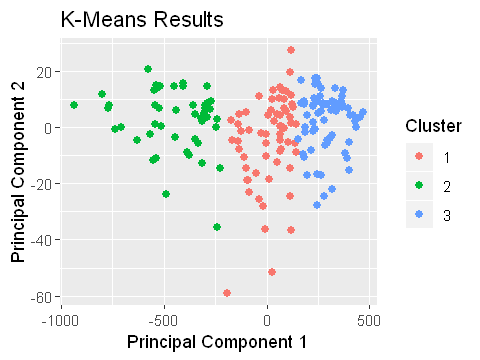

In [3]:
kmeans3 <- clust_kmeans(wine, "X1", 3)
head(kmeans3$data)
options(repr.plot.width=4, repr.plot.height=3)
plot(kmeans3$plot)
print(kmeans3$table)
print(kmeans3$entropy)

preprocessing dataset

computing good k

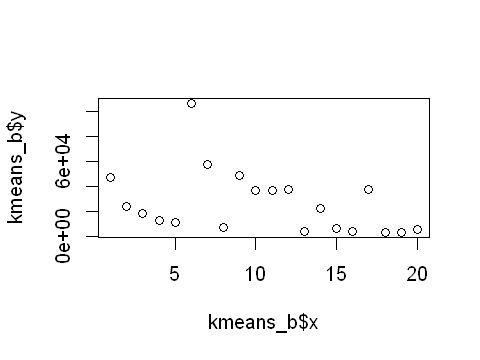

In [4]:
winen <- wine
winen$X1 <- NULL
kmeans_b <- clust_kmeans_best(winen)
options(repr.plot.width=4, repr.plot.height=3)
plot(kmeans_b$x,kmeans_b$y)

X1,X14.23,X1.71,X2.43,X15.6,X127,X2.8,X3.06,X.28,X2.29,X5.64,X1.04,X3.92,X1065,cluster
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1


        1  2  3
ctable 58 71 48
       23  0  0
        0 22 21
       26  4  1
        9 16 24
        0 29  2
[1] 1.0859033 0.0000000 0.6928767 0.5225134 1.0263155 0.2392171


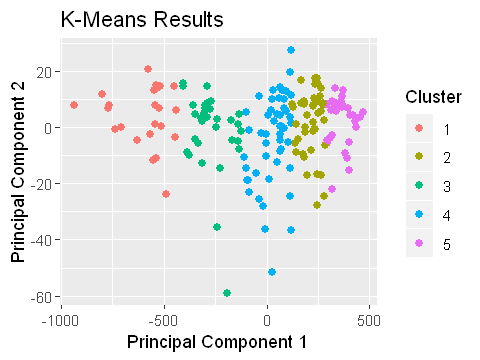

In [5]:
kmeans5 <- clust_kmeans(wine, "X1", 5)
head(kmeans5$data)
options(repr.plot.width=4, repr.plot.height=3)
plot(kmeans5$plot)
print(kmeans5$table)
print(kmeans5$entropy)

In [6]:
winen <- wine
winen$X1 <- NULL
winen = normalize.minmax(winen)[[1]]
winenp <- winen
winen$X1 <- wine$X1

k-means with 3 clusters (preprocessed data)


X14.23,X1.71,X2.43,X15.6,X127,X2.8,X3.06,X.28,X2.29,X5.64,X1.04,X3.92,X1065,X1,cluster
0.5710526,0.2055336,0.4171123,0.03092784,0.3260870,0.5758621,0.5105485,0.2452830,0.2744479,0.2645051,0.4634146,0.7802198,0.5506419,1,2
0.5605263,0.3201581,0.7005348,0.41237113,0.3369565,0.6275862,0.6118143,0.3207547,0.7570978,0.3754266,0.4471545,0.6959707,0.6469330,1,2
0.8789474,0.2391304,0.6096257,0.31958763,0.4673913,0.9896552,0.6645570,0.2075472,0.5583596,0.5563140,0.3089431,0.7985348,0.8573466,1,2
0.5815789,0.3656126,0.8074866,0.53608247,0.5217391,0.6275862,0.4957806,0.4905660,0.4447950,0.2593857,0.4552846,0.6080586,0.3259629,1,2
0.8342105,0.2015810,0.5828877,0.23711340,0.4565217,0.7896552,0.6434599,0.3962264,0.4921136,0.4667235,0.4634146,0.5787546,0.8359486,1,2
0.8842105,0.2233202,0.5828877,0.20618557,0.2826087,0.5241379,0.4599156,0.3207547,0.4952681,0.3387372,0.4390244,0.8461538,0.7218260,1,2


        1  2  3
ctable 58 71 48
        0  4 48
       58  2  0
        0 65  0
[1] 1.0859033 0.2711894 0.1461447 0.0000000


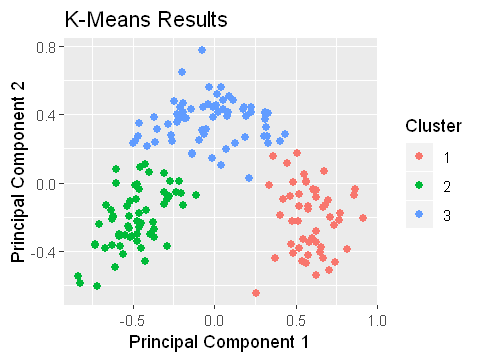

In [7]:
kmeans3n <- clust_kmeans(winen, "X1", 3)
head(kmeans3n$data)
options(repr.plot.width=4, repr.plot.height=3)
plot(kmeans3n$plot)
print(kmeans3n$table)
print(kmeans3n$entropy)

Computing good k for preprocessed data

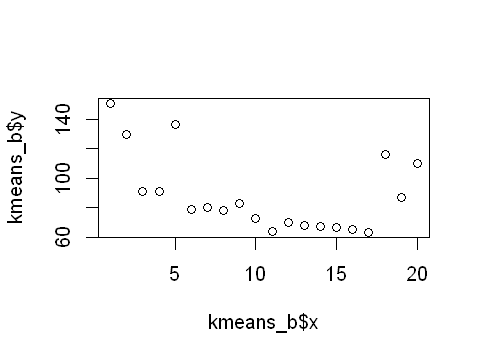

In [8]:
kmeans_b <- clust_kmeans_best(winenp)
options(repr.plot.width=4, repr.plot.height=3)
plot(kmeans_b$x,kmeans_b$y)

pam (computing best k)

In [9]:
pamk.result <- pamk(winenp)
pamk.result$nc
table(pamk.result$pamobject$clustering, winen$X1)

[1] 2

   
     1  2  3
  1 58 47  0
  2  0 24 48

pam with 3 clusters

In [10]:
pam3n <- clust_pam(winen, "X1", 3)
head(pam3n$data)
print(pam3n$table)
print(pam3n$entropy)

X14.23,X1.71,X2.43,X15.6,X127,X2.8,X3.06,X.28,X2.29,X5.64,X1.04,X3.92,X1065,X1,cluster
0.5710526,0.2055336,0.4171123,0.03092784,0.3260870,0.5758621,0.5105485,0.2452830,0.2744479,0.2645051,0.4634146,0.7802198,0.5506419,1,1
0.5605263,0.3201581,0.7005348,0.41237113,0.3369565,0.6275862,0.6118143,0.3207547,0.7570978,0.3754266,0.4471545,0.6959707,0.6469330,1,1
0.8789474,0.2391304,0.6096257,0.31958763,0.4673913,0.9896552,0.6645570,0.2075472,0.5583596,0.5563140,0.3089431,0.7985348,0.8573466,1,1
0.5815789,0.3656126,0.8074866,0.53608247,0.5217391,0.6275862,0.4957806,0.4905660,0.4447950,0.2593857,0.4552846,0.6080586,0.3259629,1,1
0.8342105,0.2015810,0.5828877,0.23711340,0.4565217,0.7896552,0.6434599,0.3962264,0.4921136,0.4667235,0.4634146,0.5787546,0.8359486,1,1
0.8842105,0.2233202,0.5828877,0.20618557,0.2826087,0.5241379,0.4599156,0.3207547,0.4952681,0.3387372,0.4390244,0.8461538,0.7218260,1,1


        1  2  3
ctable 58 71 48
       58 13  0
        0 54  0
        0  4 48
[1] 1.0859033 0.4760596 0.0000000 0.2711894


db scan

X14.23,X1.71,X2.43,X15.6,X127,X2.8,X3.06,X.28,X2.29,X5.64,X1.04,X3.92,X1065,X1,cluster
0.5710526,0.2055336,0.4171123,0.03092784,0.3260870,0.5758621,0.5105485,0.2452830,0.2744479,0.2645051,0.4634146,0.7802198,0.5506419,1,1
0.5605263,0.3201581,0.7005348,0.41237113,0.3369565,0.6275862,0.6118143,0.3207547,0.7570978,0.3754266,0.4471545,0.6959707,0.6469330,1,1
0.8789474,0.2391304,0.6096257,0.31958763,0.4673913,0.9896552,0.6645570,0.2075472,0.5583596,0.5563140,0.3089431,0.7985348,0.8573466,1,1
0.5815789,0.3656126,0.8074866,0.53608247,0.5217391,0.6275862,0.4957806,0.4905660,0.4447950,0.2593857,0.4552846,0.6080586,0.3259629,1,0
0.8342105,0.2015810,0.5828877,0.23711340,0.4565217,0.7896552,0.6434599,0.3962264,0.4921136,0.4667235,0.4634146,0.5787546,0.8359486,1,1
0.8842105,0.2233202,0.5828877,0.20618557,0.2826087,0.5241379,0.4599156,0.3207547,0.4952681,0.3387372,0.4390244,0.8461538,0.7218260,1,1


        1  2  3
ctable 58 71 48
       10 51 30
       48  7  0
        0 13  0
        0  0 18
[1] 1.0859033 0.9330037 0.3811692 0.0000000 0.0000000


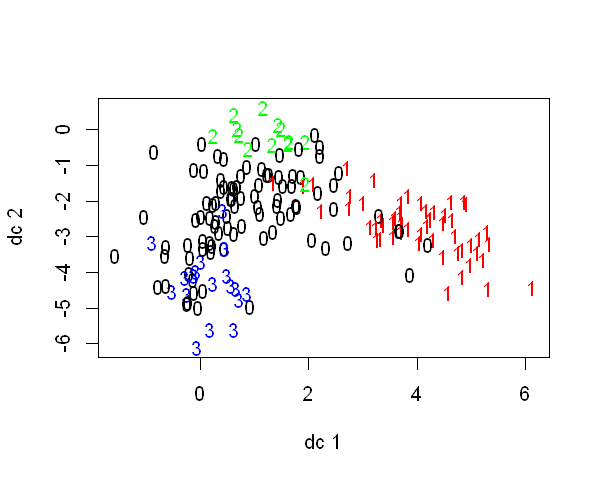

In [11]:
dbs3n <- clust_dbscan(winen, "X1", eps = 0.425, MinPts = 10)
head(dbs3n$data)
print(dbs3n$table)
print(dbs3n$entropy)
options(repr.plot.width=5, repr.plot.height=4)
plotcluster(winenp, dbs3n$clu$cluster)  

computing good eps

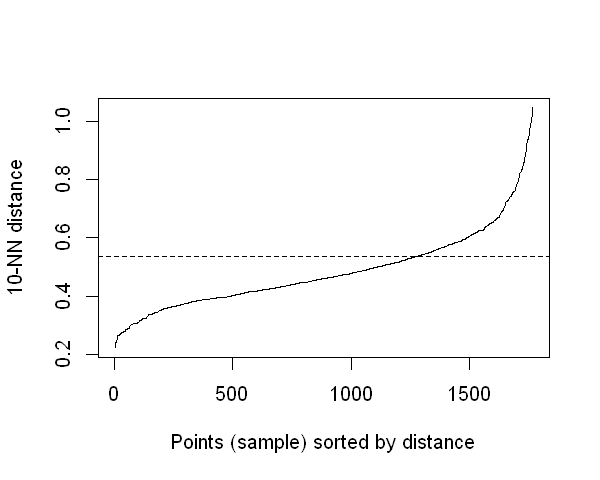

In [17]:
t <- sort(dbscan::kNNdist(winen, k =  10))
cm <- curvature.max(c(1:length(t)),t,do_plot=FALSE)
dbscan::kNNdistplot(winen, k =  10)
abline(h = cm$y, lty = 2)

X14.23,X1.71,X2.43,X15.6,X127,X2.8,X3.06,X.28,X2.29,X5.64,X1.04,X3.92,X1065,X1,cluster
0.5710526,0.2055336,0.4171123,0.03092784,0.3260870,0.5758621,0.5105485,0.2452830,0.2744479,0.2645051,0.4634146,0.7802198,0.5506419,1,1
0.5605263,0.3201581,0.7005348,0.41237113,0.3369565,0.6275862,0.6118143,0.3207547,0.7570978,0.3754266,0.4471545,0.6959707,0.6469330,1,1
0.8789474,0.2391304,0.6096257,0.31958763,0.4673913,0.9896552,0.6645570,0.2075472,0.5583596,0.5563140,0.3089431,0.7985348,0.8573466,1,1
0.5815789,0.3656126,0.8074866,0.53608247,0.5217391,0.6275862,0.4957806,0.4905660,0.4447950,0.2593857,0.4552846,0.6080586,0.3259629,1,1
0.8342105,0.2015810,0.5828877,0.23711340,0.4565217,0.7896552,0.6434599,0.3962264,0.4921136,0.4667235,0.4634146,0.5787546,0.8359486,1,1
0.8842105,0.2233202,0.5828877,0.20618557,0.2826087,0.5241379,0.4599156,0.3207547,0.4952681,0.3387372,0.4390244,0.8461538,0.7218260,1,1


        1  2  3
ctable 58 71 48
        0 18  3
       58 50  0
        0  3 45
[1] 1.0859033 0.4101163 0.6904012 0.2337917


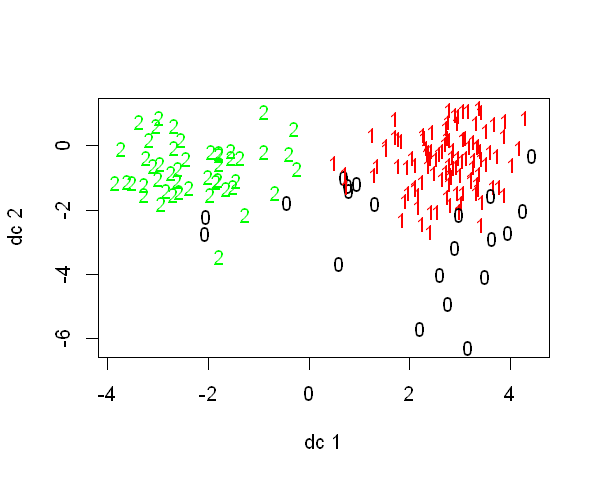

In [18]:
dbs3n <- clust_dbscan(winen, "X1", eps = cm$y, MinPts = 10)
head(dbs3n$data)
print(dbs3n$table)
print(dbs3n$entropy)
options(repr.plot.width=5, repr.plot.height=4)
plotcluster(winenp, dbs3n$clu$cluster)  

histogram clustering

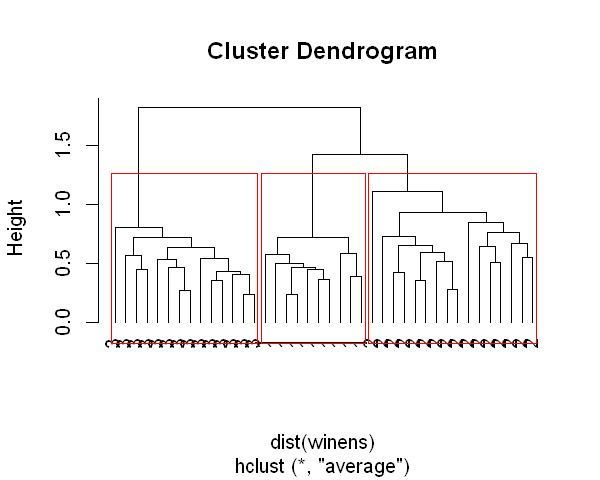

In [14]:
idx <- sample(1:dim(winen)[1], 40)
winens <- winen[idx, ]
hc <- hclust(dist(winens), method = "ave")
plot(hc, hang = -1, labels = winen$X1[idx])
rect.hclust(hc, k = 3)
groups <- cutree(hc, k = 3)